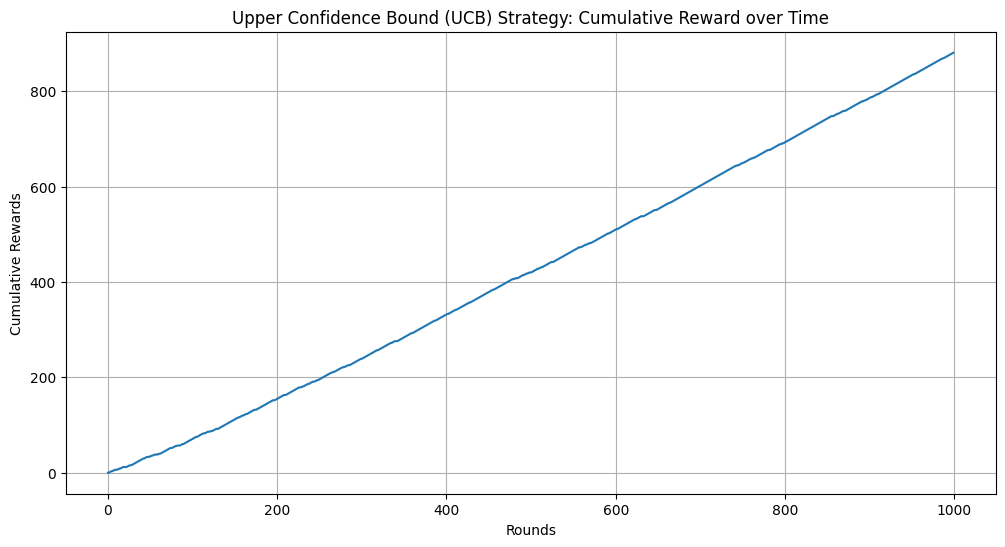

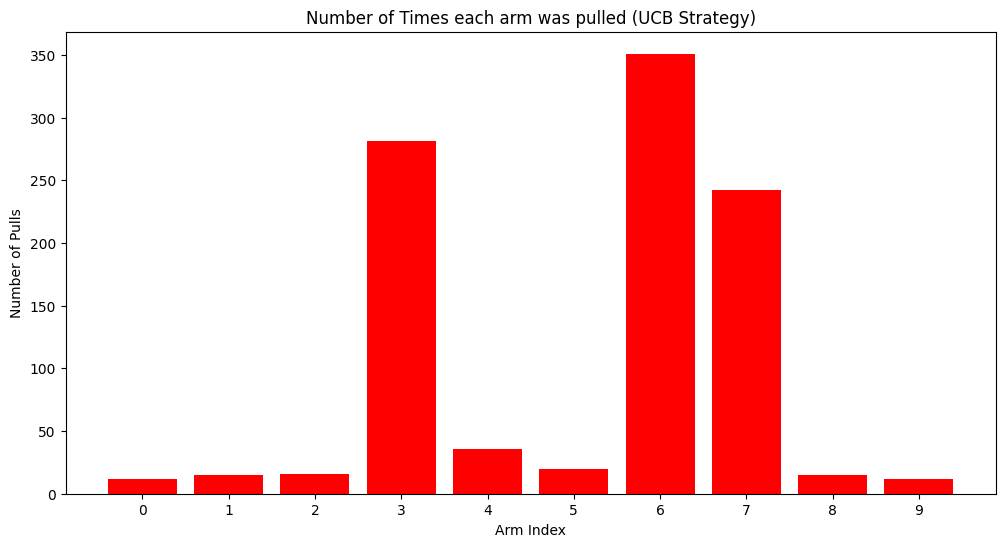

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBanditUCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.probabilities = np.random.rand(n_arms)
        self.estimates = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.total_pulls = 0

    def pull_arm(self, arm):
        return 1 if np.random.rand() < self.probabilities[arm] else 0

    def update_estimates(self, arm, reward):
        self.counts[arm] += 1
        self.total_pulls += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.counts[arm]

    def select_ucb_arm(self):
        if self.total_pulls < self.n_arms:
            return self.total_pulls
        else:
            ucb_values = np.zeros(self.n_arms)
            for arm in range(self.n_arms):
                if self.counts[arm] > 0:
                    confidence_interval = np.sqrt(2 * np.log(self.total_pulls) / self.counts[arm])
                    ucb_values[arm] = self.estimates[arm] + confidence_interval
            return np.argmax(ucb_values)

def ucb_strategy(bandit, n_rounds):
    total_reward = 0
    rewards = []
    arm_pulls = np.zeros(bandit.n_arms)

    for _ in range(n_rounds):
        arm = bandit.select_ucb_arm()
        reward = bandit.pull_arm(arm)
        bandit.update_estimates(arm, reward)
        total_reward += reward
        rewards.append(total_reward)
        arm_pulls[arm] += 1
    return rewards, arm_pulls


n_arms = 10
n_rounds = 1000

bandit = MultiArmedBanditUCB(n_arms)

rewards, arm_pulls = ucb_strategy(bandit, n_rounds)

plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel("Rounds")
plt.ylabel("Cumulative Rewards")
plt.title("Upper Confidence Bound (UCB) Strategy: Cumulative Reward over Time")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(range(n_arms), arm_pulls, color='red')
plt.xlabel("Arm Index")
plt.ylabel("Number of Pulls")
plt.title("Number of Times each arm was pulled (UCB Strategy)")
plt.xticks(range(n_arms))
plt.show()

In [ ]:
import numpy as np
import random

class EpsilonGreedyBandit:
    def __init__(self, epsilon, num_ad_slots):
        self.epsilon = epsilon  # Exploration rate
        self.num_ad_slots = num_ad_slots  # Number of ad slots (arms)
        self.ad_slot_ctr_estimates = np.zeros(num_ad_slots)  # Estimated CTR for each ad slot
        self.ad_slot_clicks = np.zeros(num_ad_slots)  # Total clicks for each ad slot
        self.ad_slot_impressions = np.zeros(num_ad_slots)  # Total impressions for each ad slot

    def select_ad_slot(self):
        """Select an ad slot using epsilon-greedy algorithm."""
        if random.uniform(0, 1) < self.epsilon:
            # Exploration: Choose a random ad slot
            return random.randint(0, self.num_ad_slots - 1)
        else:
            # Exploitation: Choose the ad slot with the highest estimated CTR
            return np.argmax(self.ad_slot_ctr_estimates)

    def update_ad_slot(self, selected_ad_slot, reward):
        """Update the estimated CTR for the selected ad slot based on the reward."""
        self.ad_slot_impressions[selected_ad_slot] += 1
        self.ad_slot_clicks[selected_ad_slot] += reward

        # Update the CTR estimate for the selected ad slot
        self.ad_slot_ctr_estimates[selected_ad_slot] = (
            self.ad_slot_clicks[selected_ad_slot] / self.ad_slot_impressions[selected_ad_slot]
        )

def simulate_ad_impressions(epsilon_greedy, true_ad_slot_ctr, num_impressions):
    """Simulate the ad impressions and clicks."""
    total_clicks = 0
    
    for i in range(num_impressions):
        # Step 1: Select an ad slot using the epsilon-greedy strategy
        selected_ad_slot = epsilon_greedy.select_ad_slot()
        
        # Step 2: Simulate whether a click occurred based on the true CTR of the ad slot
        reward = 1 if random.uniform(0, 1) < true_ad_slot_ctr[selected_ad_slot] else 0
        
        # Step 3: Update the ad slot's estimated CTR
        epsilon_greedy.update_ad_slot(selected_ad_slot, reward)
        
        # Track total clicks for performance evaluation
        total_clicks += reward
        
    return total_clicks

# Parameters for the simulation
epsilon = 0.1  # 10% chance to explore
num_ad_slots = 4  # We have 4 ad slots (arms)
num_impressions = 1000  # Simulate 1000 ad impressions

# True click-through rates (CTR) for each ad slot
# Let's assume these values are known for simulation purposes
true_ad_slot_ctr = [0.05, 0.10, 0.08, 0.12]  # Top Banner, Sidebar, Footer, Pop-up

# Create an instance of the EpsilonGreedyBandit
epsilon_greedy_bandit = EpsilonGreedyBandit(epsilon, num_ad_slots)

# Run the simulation
total_clicks = simulate_ad_impressions(epsilon_greedy_bandit, true_ad_slot_ctr, num_impressions)

# Print results
print("Total Clicks:", total_clicks)
print("Estimated CTR for each ad slot:")
for i, ctr in enumerate(epsilon_greedy_bandit.ad_slot_ctr_estimates):
    print(f"Ad Slot {i + 1} (True CTR: {true_ad_slot_ctr[i]}): Estimated CTR = {ctr:.4f}")


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class DynamicEpsilonGreedyBandit:
    def __init__(self, epsilon, num_ad_slots):
        self.epsilon = epsilon  # Exploration rate
        self.num_ad_slots = num_ad_slots  # Number of ad slots (arms)
        self.ad_slot_ctr_estimates = np.zeros(num_ad_slots)  # Estimated CTR for each ad slot
        self.ad_slot_clicks = np.zeros(num_ad_slots)  # Total clicks for each ad slot
        self.ad_slot_impressions = np.zeros(num_ad_slots)  # Total impressions for each ad slot

    def select_ad_slot(self):
        """Select an ad slot using epsilon-greedy algorithm."""
        if random.uniform(0, 1) < self.epsilon:
            # Exploration: Choose a random ad slot
            return random.randint(0, self.num_ad_slots - 1)
        else:
            # Exploitation: Choose the ad slot with the highest estimated CTR
            return np.argmax(self.ad_slot_ctr_estimates)

    def update_ad_slot(self, selected_ad_slot, reward):
        """Update the estimated CTR for the selected ad slot based on the reward."""
        self.ad_slot_impressions[selected_ad_slot] += 1
        self.ad_slot_clicks[selected_ad_slot] += reward

        # Update the CTR estimate for the selected ad slot
        self.ad_slot_ctr_estimates[selected_ad_slot] = (
            self.ad_slot_clicks[selected_ad_slot] / self.ad_slot_impressions[selected_ad_slot]
        )

def dynamic_ctr(t, base_ctr):
    """Generate a dynamic CTR that changes over time using a sine wave."""
    return base_ctr * (0.8 + 0.4 * np.sin(0.01 * t))

def simulate_dynamic_ad_impressions(epsilon_greedy, base_ad_slot_ctr, num_impressions):
    """Simulate the ad impressions and clicks in a dynamic environment."""
    total_clicks = 0
    true_ctr_history = np.zeros((num_impressions, len(base_ad_slot_ctr)))
    
    for t in range(num_impressions):
        # Step 1: Get the true CTR for each ad slot at time t (changing over time)
        true_ad_slot_ctr = [dynamic_ctr(t, base) for base in base_ad_slot_ctr]
        true_ctr_history[t] = true_ad_slot_ctr
        
        # Step 2: Select an ad slot using epsilon-greedy strategy
        selected_ad_slot = epsilon_greedy.select_ad_slot()
        
        # Step 3: Simulate whether a click occurred based on the true CTR of the selected ad slot
        reward = 1 if random.uniform(0, 1) < true_ad_slot_ctr[selected_ad_slot] else 0
        
        # Step 4: Update the estimated CTR for the selected ad slot
        epsilon_greedy.update_ad_slot(selected_ad_slot, reward)
        
        # Track total clicks for performance evaluation
        total_clicks += reward
    
    return total_clicks, true_ctr_history

# Parameters for the simulation
epsilon = 0.1  # 10% chance to explore
num_ad_slots = 4  # We have 4 ad slots (arms)
num_impressions = 1000  # Simulate 1000 ad impressions

# Base true click-through rates (CTR) for each ad slot
base_ad_slot_ctr = [0.05, 0.10, 0.08, 0.12]  # Top Banner, Sidebar, Footer, Pop-up

# Create an instance of the DynamicEpsilonGreedyBandit
epsilon_greedy_bandit = DynamicEpsilonGreedyBandit(epsilon, num_ad_slots)

# Run the simulation in a dynamic environment
total_clicks, true_ctr_history = simulate_dynamic_ad_impressions(epsilon_greedy_bandit, base_ad_slot_ctr, num_impressions)

# Print results
print(f"Total Clicks: {total_clicks}")
print("Estimated CTR for each ad slot:")
for i, ctr in enumerate(epsilon_greedy_bandit.ad_slot_ctr_estimates):
    print(f"Ad Slot {i + 1}: Estimated CTR = {ctr:.4f}")

# Plot the true CTRs over time
plt.figure(figsize=(10, 6))
for i in range(num_ad_slots):
    plt.plot(true_ctr_history[:, i], label=f'Ad Slot {i + 1} True CTR')
plt.xlabel('Time (Impressions)')
plt.ylabel('CTR')
plt.title('True CTRs of Ad Slots Over Time')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NonstationaryBandit:
    def __init__(self, n_arms, decay_factor=0.9):
        self.n_arms = n_arms
        self.decay_factor = decay_factor
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Estimated value for each arm
        self.total_counts = 0  # Total number of times an arm has been pulled

    def select_arm(self):
        # Use an adaptation of the Upper Confidence Bound (UCB) algorithm
        ucb_values = np.zeros(self.n_arms)
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                # Encourage exploring arms that haven't been pulled yet
                return i
            ucb_values[i] = self.values[i] + np.sqrt((2 * np.log(self.total_counts + 1)) / self.counts[i])
        
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # Update counts and values with a decay factor to emphasize recent rewards
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        # Update the estimated value of the chosen arm using a discount factor for old data
        old_value = self.values[chosen_arm]
        self.values[chosen_arm] = old_value * self.decay_factor + (1 - self.decay_factor) * reward


# Function to randomly change the reward distribution of selected arms
def generate_rewards_with_random_arm_change(rewards, change_prob=0.1):
    new_rewards = rewards.copy()
    for arm in range(len(rewards)):
        if np.random.rand() < change_prob:
            new_rewards[arm] = np.random.rand()  # Randomly update the reward for this arm
    return new_rewards


# Simulating a Nonstationary Bandit Problem

n_arms = 3
n_iterations = 1000
decay_factor = 0.95
change_prob = 0.1

# Create a bandit problem instance
bandit = NonstationaryBandit(n_arms, decay_factor)

# Lists to track rewards, selected arms, estimated values, and true rewards
rewards = []
selected_arms = []
estimated_values = np.zeros((n_iterations, n_arms))
true_rewards = np.random.rand(n_arms)  # Initial reward probabilities for each arm
true_reward_history = np.zeros((n_iterations, n_arms))

for t in range(n_iterations):
    # Track the true rewards over time
    true_reward_history[t] = true_rewards

    # Choose an arm
    chosen_arm = bandit.select_arm()
    selected_arms.append(chosen_arm)

    # Get a reward based on the current true reward probability of the chosen arm
    reward = 1 if np.random.rand() < true_rewards[chosen_arm] else 0
    rewards.append(reward)

    # Update the bandit with the observed reward
    bandit.update(chosen_arm, reward)

    # Track estimated values for each arm
    estimated_values[t] = bandit.values

    # Update true rewards dynamically by changing some arms
    true_rewards = generate_rewards_with_random_arm_change(true_rewards, change_prob)


# Function to plot results
def plot_results(estimated_values, rewards, true_reward_history):
    n_iterations, n_arms = estimated_values.shape

    # Plot estimated values for each arm over time
    plt.figure(figsize=(14, 6))
    for i in range(n_arms):
        plt.plot(estimated_values[:, i], label=f'Estimated Value of Arm {i}')
    plt.xlabel('Iteration')
    plt.ylabel('Estimated Reward')
    plt.title('Estimated Reward Values of Each Arm Over Time')
    plt.legend()
    plt.show()

    # Plot average exploration reward over time
    plt.figure(figsize=(14, 6))
    plt.plot(np.cumsum(rewards) / (np.arange(n_iterations) + 1), label='Average Exploration Reward')
    plt.xlabel('Iteration')
    plt.ylabel('Average Reward')
    plt.title('Average Exploration Reward Over Time')
    plt.legend()
    plt.show()

    # Plot true reward values over time
    plt.figure(figsize=(14, 6))
    for i in range(n_arms):
        plt.plot(true_reward_history[:, i], label=f'True Reward of Arm {i}', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('True Reward Probability')
    plt.title('True Reward Values of Each Arm Over Time')
    plt.legend()
    plt.show()

# Plot the results
plot_results(estimated_values, rewards, true_reward_history)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NonstationaryBandit:
    def __init__(self, n_arms, decay_factor=0.9):
        self.n_arms = n_arms
        self.decay_factor = decay_factor
        self.counts = np.zeros(n_arms)  # Number of times each arm has been pulled
        self.values = np.zeros(n_arms)  # Estimated value for each arm
        self.total_counts = 0  # Total number of times an arm has been pulled

    def select_arm(self):
        # Use an adaptation of the Upper Confidence Bound (UCB) algorithm
        ucb_values = np.zeros(self.n_arms)
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                # Encourage exploring arms that haven't been pulled yet
                return i
            ucb_values[i] = self.values[i] + np.sqrt((2 * np.log(self.total_counts + 1)) / self.counts[i])
        
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # Update counts and values with a decay factor to emphasize recent rewards
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        # Update the estimated value of the chosen arm using a discount factor for old data
        old_value = self.values[chosen_arm]
        self.values[chosen_arm] = old_value * self.decay_factor + (1 - self.decay_factor) * reward

# Simulating a Nonstationary Bandit Problem

# True reward probabilities that change over time for each arm
def generate_rewards(n_arms, t):
    return [0.5 + 0.2 * np.sin(0.1 * t + i) for i in range(n_arms)]

n_arms = 5
n_iterations = 1000
decay_factor = 0.95

# Create a bandit problem instance
bandit = NonstationaryBandit(n_arms, decay_factor)

# Lists to track rewards and estimated values
rewards = []
selected_arms = []
estimated_values = np.zeros((n_iterations, n_arms))

for t in range(n_iterations):
    # Simulate nonstationary reward probabilities
    true_probs = generate_rewards(n_arms, t)
    
    # Choose an arm
    chosen_arm = bandit.select_arm()
    selected_arms.append(chosen_arm)

    # Get a reward based on the current true reward probability of the chosen arm
    reward = 1 if np.random.rand() < true_probs[chosen_arm] else 0
    rewards.append(reward)
    
    # Update the bandit with the observed reward
    bandit.update(chosen_arm, reward)

    # Track estimated values for each arm
    estimated_values[t] = bandit.values

# Plotting the results

# Plot estimated values for each arm over time
plt.figure(figsize=(14, 6))
for i in range(n_arms):
    plt.plot(estimated_values[:, i], label=f'Estimated Value of Arm {i}')
plt.xlabel('Iteration')
plt.ylabel('Estimated Reward')
plt.title('Estimated Reward Values of Each Arm Over Time')
plt.legend()
plt.show()

# Plot average exploration reward over time
plt.figure(figsize=(14, 6))
plt.plot(np.cumsum(rewards) / (np.arange(n_iterations) + 1), label='Average Exploration Reward')
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Average Exploration Reward Over Time')
plt.legend()
plt.show()

# CIA-I

In [1]:
import numpy as np
import plotly.graph_objects as go
import random

# Define constants for the problem
NUM_ALGORITHMS = 3
NUM_PRODUCTS = 10
NUM_ROUNDS = 1000

# Initialize variables to track cumulative rewards
cumulative_rewards = np.zeros((NUM_ALGORITHMS, NUM_ROUNDS))

# Store data for the Thompson Sampling algorithm
def thompson_sampling(num_rounds, num_products):
    """
    Function to implement Thompson Sampling Algorithm.
    """
    product_rewards_1 = [0] * num_products
    product_rewards_0 = [0] * num_products
    total_rewards = []

    for round_num in range(num_rounds):
        product_selected = 0
        max_beta = 0
        
        for i in range(num_products):
            beta_sample = random.betavariate(product_rewards_1[i] + 1, product_rewards_0[i] + 1)
            if beta_sample > max_beta:
                max_beta = beta_sample
                product_selected = i

        reward = random.choice([0, 1])  # Simulate customer click
        if reward == 1:
            product_rewards_1[product_selected] += 1
        else:
            product_rewards_0[product_selected] += 1
        
        total_rewards.append(sum(product_rewards_1))

    return total_rewards

# Implement the UCB algorithm
def upper_confidence_bound(num_rounds, num_products):
    """
    Function to implement Upper Confidence Bound (UCB) Algorithm.
    """
    rewards = [0] * num_products
    counts = [0] * num_products
    total_rewards = []

    for round_num in range(num_rounds):
        product_selected = 0
        max_ucb = 0

        for i in range(num_products):
            if counts[i] > 0:
                avg_reward = rewards[i] / counts[i]
                delta = np.sqrt(2 * np.log(round_num + 1) / counts[i])
                ucb = avg_reward + delta
            else:
                ucb = 1e400  # Set to a large value

            if ucb > max_ucb:
                max_ucb = ucb
                product_selected = i

        reward = random.choice([0, 1])  # Simulate customer click
        rewards[product_selected] += reward
        counts[product_selected] += 1

        total_rewards.append(sum(rewards))

    return total_rewards

# Implement the epsilon-greedy algorithm
def epsilon_greedy(num_rounds, num_products, epsilon=0.1):
    """
    Function to implement Epsilon-Greedy Algorithm.
    """
    rewards = [0] * num_products
    counts = [0] * num_products
    total_rewards = []

    for round_num in range(num_rounds):
        explore = random.uniform(0, 1) < epsilon
        if explore:
            product_selected = random.randint(0, num_products - 1)
        else:
            avg_rewards = [rewards[i] / counts[i] if counts[i] > 0 else 0 for i in range(num_products)]
            product_selected = np.argmax(avg_rewards)

        reward = random.choice([0, 1])  # Simulate customer click
        rewards[product_selected] += reward
        counts[product_selected] += 1

        total_rewards.append(sum(rewards))

    return total_rewards

# Run simulations for each algorithm
def run_algorithms(num_rounds, num_products):
    """
    Run all three algorithms and collect data.
    """
    ts_rewards = thompson_sampling(num_rounds, num_products)
    ucb_rewards = upper_confidence_bound(num_rounds, num_products)
    eg_rewards = epsilon_greedy(num_rounds, num_products)

    return ts_rewards, ucb_rewards, eg_rewards

# Visualize the results
def visualize_results(ts_rewards, ucb_rewards, eg_rewards):
    """
    Create a comparative chart to visualize cumulative rewards.
    """
    rounds = list(range(1, len(ts_rewards) + 1))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=rounds, y=ts_rewards, mode='lines', name='Thompson Sampling', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=rounds, y=ucb_rewards, mode='lines', name='Upper Confidence Bound', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=rounds, y=eg_rewards, mode='lines', name='Epsilon-Greedy', line=dict(color='blue')))
    
    fig.update_layout(
        title='Performance of Multi-Armed Bandit Algorithms',
        xaxis_title='Rounds',
        yaxis_title='Cumulative Rewards',
        template='plotly_dark'
    )
    
    fig.show()

# Main function to execute the entire flow
def main():
    """
    Main function to run the algorithms and visualize their performance.
    """
    ts_rewards, ucb_rewards, eg_rewards = run_algorithms(NUM_ROUNDS, NUM_PRODUCTS)
    visualize_results(ts_rewards, ucb_rewards, eg_rewards)

# Run the main function
main()

In [ ]:
# Constants for the ad-slots scenario
NUM_AD_SLOTS = 4
NUM_SIMULATION_ROUNDS = 1000

# True CTRs for the 4 ad-slots (simulated true probabilities of clicks)
TRUE_CTRS = [0.05, 0.12, 0.08, 0.15]

# Thompson Sampling for estimating CTRs of ad-slots
def thompson_sampling_ads(num_rounds, num_ad_slots, true_ctrs):
    """
    Estimate the CTRs of ad-slots using Thompson Sampling.
    """
    ad_rewards_1 = [0] * num_ad_slots
    ad_rewards_0 = [0] * num_ad_slots
    estimated_ctrs = []

    for round_num in range(num_rounds):
        ad_selected = 0
        max_beta = 0
        
        for i in range(num_ad_slots):
            beta_sample = random.betavariate(ad_rewards_1[i] + 1, ad_rewards_0[i] + 1)
            if beta_sample > max_beta:
                max_beta = beta_sample
                ad_selected = i

        # Simulate the click based on true CTRs
        reward = 1 if random.random() < true_ctrs[ad_selected] else 0
        
        if reward == 1:
            ad_rewards_1[ad_selected] += 1
        else:
            ad_rewards_0[ad_selected] += 1

        # Update estimated CTRs
        est_ctr = [ad_rewards_1[i] / (ad_rewards_1[i] + ad_rewards_0[i]) if ad_rewards_1[i] + ad_rewards_0[i] > 0 else 0 for i in range(num_ad_slots)]
        estimated_ctrs.append(est_ctr)

    final_estimated_ctrs = [ad_rewards_1[i] / (ad_rewards_1[i] + ad_rewards_0[i]) if ad_rewards_1[i] + ad_rewards_0[i] > 0 else 0 for i in range(num_ad_slots)]
    
    return final_estimated_ctrs, estimated_ctrs

# Run the Thompson Sampling for ad-slots and calculate the estimated CTRs
def run_ad_simulation():
    final_estimated_ctrs, estimated_ctrs = thompson_sampling_ads(NUM_SIMULATION_ROUNDS, NUM_AD_SLOTS, TRUE_CTRS)

    # Print True CTRs and Estimated CTRs
    print("True CTRs:", TRUE_CTRS)
    print("Estimated CTRs after simulation:", final_estimated_ctrs)

    # Visualization of CTR estimation over rounds
    rounds = list(range(1, NUM_SIMULATION_ROUNDS + 1))
    fig = go.Figure()

    for i in range(NUM_AD_SLOTS):
        slot_ctrs = [estimated_ctrs[round_num][i] for round_num in range(NUM_SIMULATION_ROUNDS)]
        fig.add_trace(go.Scatter(x=rounds, y=slot_ctrs, mode='lines', name=f'Ad Slot {i+1}'))

    fig.update_layout(
        title='Estimated CTRs for Each Ad Slot Over Rounds',
        xaxis_title='Rounds',
        yaxis_title='Estimated CTR',
        template='plotly_dark'
    )
    
    fig.show()

# Run the ad simulation
run_ad_simulation()